<a href="https://colab.research.google.com/github/partha1189/machine_learning/blob/tf_2.0_practice/CNN_Fashion_MNIST_visualize_conv_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.0


In [3]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
training_images.shape

(60000, 28, 28)

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0
training_images = training_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [6]:
training_images.shape

(60000, 28, 28, 1)

In [8]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (28, 28, 1)),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')                                                
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.998):
      print('Reached 99.8% accuracy so stopping training!')
      self.model.stop_training = True
callback = myCallback()

In [12]:
history = model.fit(training_images, training_labels, epochs = 20, callbacks=[callback])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4873 - accuracy: 0.8243
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3338 - accuracy: 0.8788
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2867 - accuracy: 0.8945
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2535 - accuracy: 0.9057
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2301 - accuracy: 0.9146
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2086 - accuracy: 0.9219
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1912 - accuracy: 0.9291
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1743 - accuracy: 0.9337
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1604 - accuracy: 0.9395
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.147

In [13]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.9051


In [15]:
test_loss

[0.4193992614746094, 0.9050999879837036]

Visualize Convolutions

In [18]:
import matplotlib.pyplot as plt
import pdb

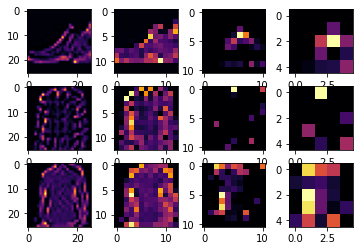

In [22]:
f, axarr = plt.subplots(3, 4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers] #all layers outputs
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)#creates model from inputs and outputs of layers
for x in range(0, 4):
  #pdb.set_trace()
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]#filter o/p shape is (1,26,26,1) as in model summary , Here X is layer number
  axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap= 'inferno')#display the specified CONVOLUTION_NUMBER(filter_number) out of 16 filters
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap= 'inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap= 'inferno')
  axarr[2,x].grid(False)

LAYER1(CONV1)  --> LAYER2(MAXPOOL1) --> LAYER3(CONV2) --> LAYER4(MAXPOOL2)